In [11]:
import pickle as pk
import numpy as np
from glob import glob

data_dir="/dev/shm/data/patches"
!ls -lrt $data_dir/

total 21964528
-rw-rw-r-- 1 ubuntu ubuntu 1447758130 Oct  9 21:42 patches0.npz
-rw-rw-r-- 1 ubuntu ubuntu 1291505818 Oct  9 21:43 patches1.npz
-rw-rw-r-- 1 ubuntu ubuntu 1138911362 Oct  9 21:44 patches2.npz
-rw-rw-r-- 1 ubuntu ubuntu 1084877298 Oct  9 21:44 patches3.npz
-rw-rw-r-- 1 ubuntu ubuntu 1200516650 Oct  9 21:45 patches4.npz
-rw-rw-r-- 1 ubuntu ubuntu 1220419690 Oct  9 21:45 patches5.npz
-rw-rw-r-- 1 ubuntu ubuntu 1128785018 Oct  9 21:46 patches6.npz
-rw-rw-r-- 1 ubuntu ubuntu 1534161530 Oct  9 21:47 patches7.npz
-rw-rw-r-- 1 ubuntu ubuntu 1261879874 Oct  9 21:48 patches8.npz
-rw-rw-r-- 1 ubuntu ubuntu 1272732410 Oct  9 21:48 patches9.npz
-rw-rw-r-- 1 ubuntu ubuntu 1380666058 Oct  9 21:49 patches10.npz
-rw-rw-r-- 1 ubuntu ubuntu 1285171810 Oct  9 21:50 patches11.npz
-rw-rw-r-- 1 ubuntu ubuntu 1492741690 Oct  9 21:50 patches12.npz
-rw-rw-r-- 1 ubuntu ubuntu 1504670066 Oct  9 21:51 patches13.npz
-rw-rw-r-- 1 ubuntu ubuntu 1402008034 Oct  9 21:52 patches14.npz
-rw-rw-r-- 1 ubuntu 

In [12]:
patches=[]
for file in glob(data_dir+'/patches*.npz'):
    print(file)
    content=np.load(file)
    patches.append(content['Vout'])

/dev/shm/data/patches/patches9.npz
/dev/shm/data/patches/patches7.npz
/dev/shm/data/patches/patches8.npz
/dev/shm/data/patches/patches5.npz
/dev/shm/data/patches/patches4.npz
/dev/shm/data/patches/patches3.npz
/dev/shm/data/patches/patches15.npz
/dev/shm/data/patches/patches13.npz
/dev/shm/data/patches/patches16.npz
/dev/shm/data/patches/patches14.npz
/dev/shm/data/patches/patches2.npz
/dev/shm/data/patches/patches12.npz
/dev/shm/data/patches/patches0.npz
/dev/shm/data/patches/patches10.npz
/dev/shm/data/patches/patches11.npz
/dev/shm/data/patches/patches1.npz
/dev/shm/data/patches/patches6.npz


In [13]:
combined=np.concatenate(patches)
combined.size/1000000.

2811.454009

In [14]:
combined.shape


(1672489, 41, 41)

In [17]:
shuffle=np.random.permutation(combined.shape[0])

In [18]:
scombined=combined[shuffle,:,:]

In [19]:
scombined.shape

(1672489, 41, 41)

In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


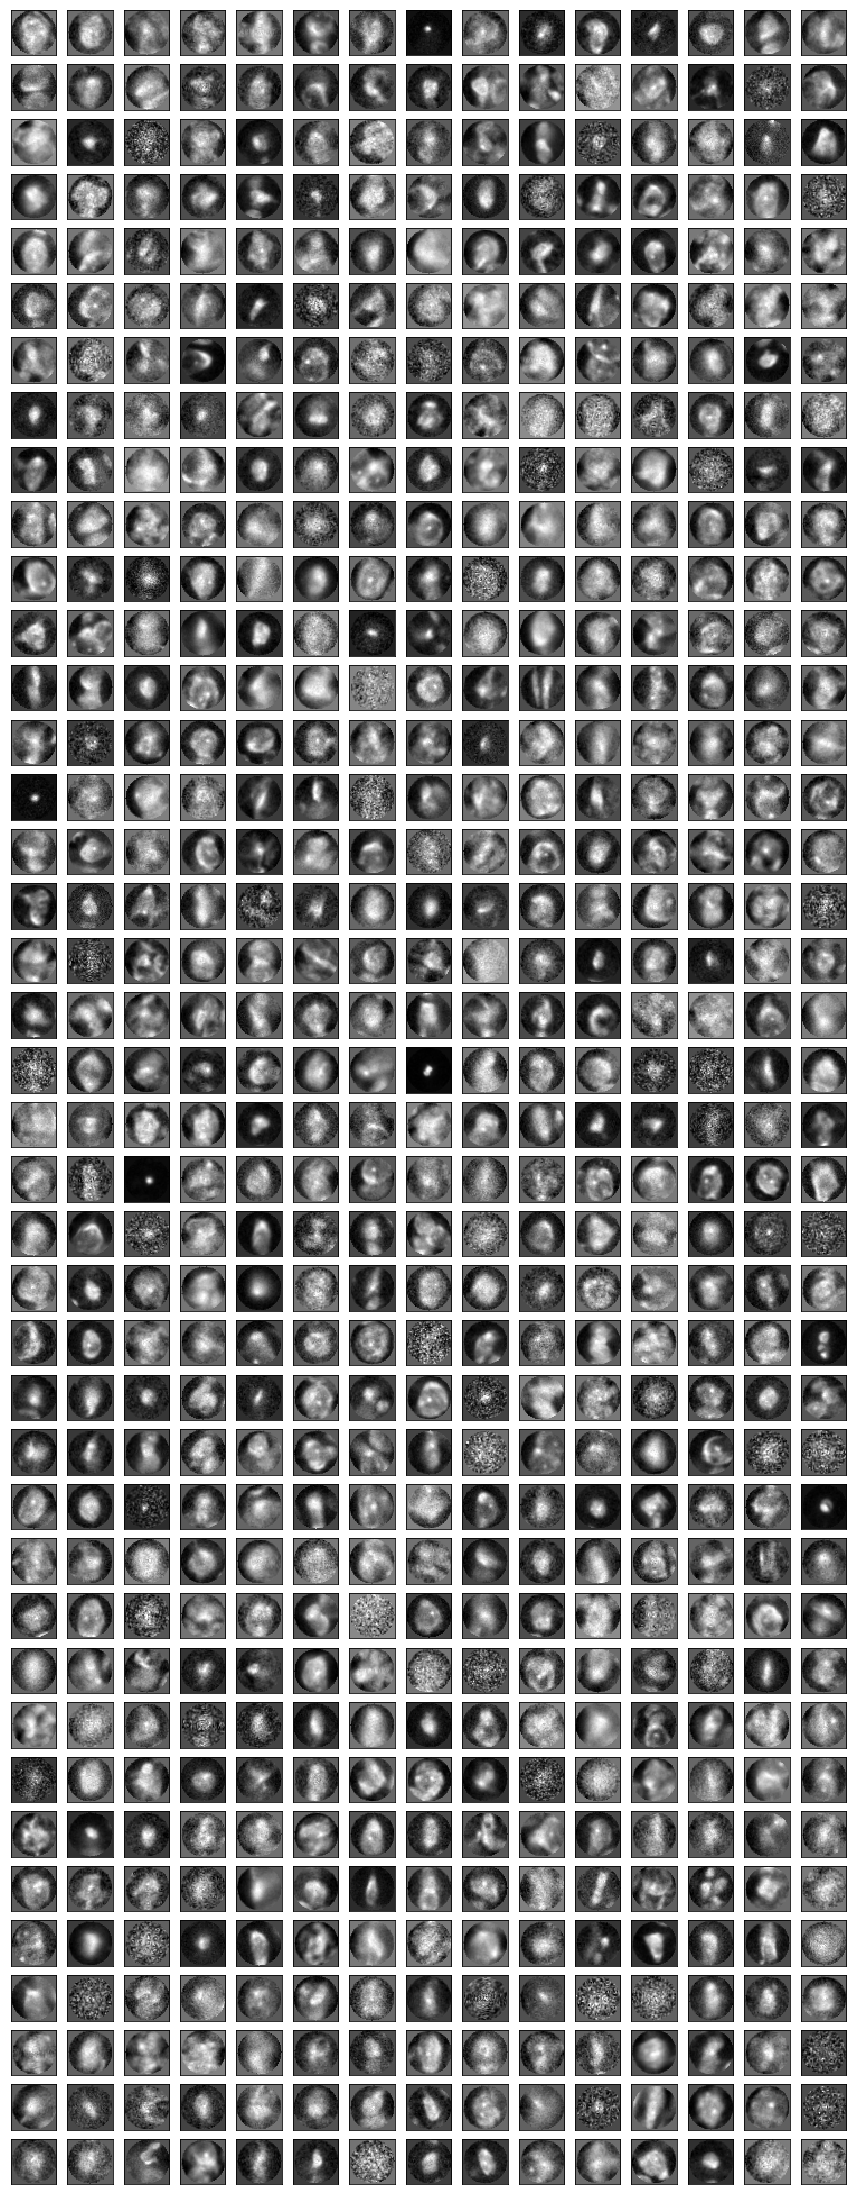

In [23]:
h=40
w=15
shift=1000
figure(figsize=(w,h))
for i in range(h*w):
    subplot(h,w,i+1);
    fig=imshow(scombined[shift+i,:,:],cmap='gray')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [24]:
combined=[]

In [25]:
def dist2(a,b):
    diff=a-b
    diff=diff**2
    return sum(diff.flatten())

In [38]:
D=[]
for i in range(1,scombined.shape[0]):
    D.append(dist2(scombined[i,:,:],scombined[i-1,:,:]))
    if i%1000==0:
        print('\r',i,end='')

 1672000

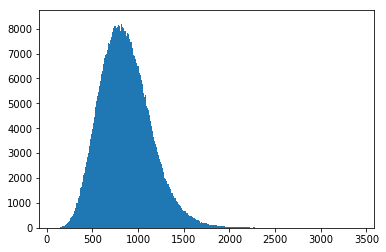

In [40]:
hist(D,bins=1000);

In [41]:
max(D)

3417.5868987876183

In [ ]:
Reps=[scombined[0,:,:]]

scale=3500.
Statistics=[]
for i in range(1,scombined.shape[0]):
    _min=100000
    patch=scombined[i,:,:]
    for r in Reps:
        _min=min(_min,dist2(patch,r))
    Prob=_min/scale
    print('\r i=%10d,  #reps=%10d  Prob=%8.6f'%(i,len(Reps),Prob),end='')
    Statistics.append((i,len(Reps),_min))
    if np.random.rand()<Prob:
        Reps.append(patch)

 i=       370,  #reps=        59  Prob=0.111299

 i=       605,  #reps=        85  Prob=0.056959

 i=       788,  #reps=       111  Prob=0.089374

 i=     34402,  #reps=      3372  Prob=0.136963